In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

!pip install xgboost
import xgboost as xgb

!pip install lightgbm
from lightgbm import LGBMRegressor

!pip install catboost
from catboost import CatBoostRegressor

!pip install optuna
import optuna

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)

plt.style.use('seaborn-v0_8-deep')

%matplotlib inline

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Scatter Plot**

In [5]:
def PlotScatter(x, y, title, xunit, yunit, format_x, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    plt.scatter(x, y, alpha=0.7)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)
    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    if (format_x == 1):
        plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)
    plt.show()
    plt.close()

## **Box Plot**

In [7]:
def PlotBoxPlot(df_x, df_y, title, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.show()
    plt.close()

In [8]:
def PlotBoxPlotV2(df_x, df_y, title, yunit, size_x, size_y):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.gcf().set_size_inches(size_x, size_y)

    plt.show()
    plt.close()

## **Regression Plot**

In [10]:
def PlotRegPlot(df_x, df_y, title, xunit, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    plt.show()
    plt.close()

## **Histogram**

In [12]:
def HistPlot(x, title, xunit, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.histplot(x = x)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(0.98, -0.08)

    plt.ylabel("Count")

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)

    plt.show()
    plt.close()

## **Predicted vs Actual Values**

In [14]:
def PlotFitted(y_test, yhat, title):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")
    
    plt.title(title)

    y_test1 = np.exp(y_test)
    yhat1 = np.exp(yhat)

    sns.scatterplot(x=y_test1.to_numpy().flatten(), y=yhat1, alpha=0.6)
    plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

    plt.gcf().set_size_inches(7, 5)

    plt.ylim(0,)
    plt.xlim(0,)
    
    plt.show()
    plt.close()
    
    
    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

In [15]:
def PlotFittedV(yhat, y_test, model, x_data, y_data, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(y_test, hist=False, color="r", label = "Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))
    print("- Cross-Validation Score:", cross_val_score(model, x_data, y_data, cv=5).mean())

In [16]:
def PlotFittedV2(yhat, y_test, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(np.exp(y_test), hist=False, color="r", label = "Actual Value")
    sns.distplot(np.exp(yhat), hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

## **Line Plot**

In [18]:
def PlotLine(y, title, yunit, x_size, y_size):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  plt.plot(y)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

## **K-Fold Target Encoding**

In [20]:
def KFTE(df, df_test, categ_f, target):
  kf = KFold(n_splits = 5, shuffle = True, random_state = 13)

  nome = categ_f + "_E"

  df[nome] = 0.0

  for train_idx, val_idx in kf.split(df):
      fold_train = df.iloc[train_idx]
      fold_valid  = df.iloc[val_idx]

      medias_feature = fold_train.groupby(categ_f)[target].mean()
      media_global = fold_train[target].mean()

      feature_encoded = fold_valid[categ_f].map(medias_feature).fillna(media_global)
      df.loc[val_idx, nome] = feature_encoded

  mapping = df.groupby(categ_f)[target].mean().to_dict()
  global_mean = df[target].mean()

  df_test[categ_f] = df_test[categ_f].map(mapping).fillna(global_mean)

# **DATASET LOADING**

In [22]:
HousePricesDF = pd.read_csv("../data/raw/train.csv")
HousePricesDF_test = pd.read_csv("../data/raw/test.csv")
HousePricesDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
HousePricesDF.shape

(1460, 81)

In [24]:
HousePricesDF_test.shape

(1459, 80)

# **DATA CLEANING, PROCESSING, AND CONSOLIDATION**

## **DEALING WITH MISSING DATA**

In [27]:
HousePricesDF.isna().sum()[HousePricesDF.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### **LotFrontage**

In [29]:
HousePricesDF[['LotFrontage']].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


In [30]:
HousePricesDF[['LotFrontage']].value_counts().sort_index()

LotFrontage
21.0            23
24.0            19
30.0             6
32.0             5
33.0             1
34.0            10
35.0             9
36.0             6
37.0             5
38.0             1
39.0             1
40.0            12
41.0             6
42.0             4
43.0            12
44.0             9
45.0             3
46.0             1
47.0             5
48.0             6
49.0             4
50.0            57
51.0            15
52.0            14
53.0            10
54.0             6
55.0            17
56.0             5
57.0            12
58.0             7
59.0            13
60.0           143
61.0             8
62.0             9
63.0            17
64.0            19
65.0            44
66.0            15
67.0            12
68.0            19
69.0            11
70.0            70
71.0            12
72.0            17
73.0            18
74.0            15
75.0            53
76.0            11
77.0             9
78.0            25
79.0            17
80.0            69


Let's compare the impact on the correlation value when replacing null values with the mean, median, and mode.

Note: We will consider '313' as an outlier in the following calculations.

In [32]:
i = [HousePricesDF.corr(numeric_only = True)['SalePrice'][['LotFrontage']].iloc[0]]

# Replace it with mean
df = HousePricesDF[['LotFrontage', 'SalePrice']].copy()
df['LotFrontage'] = df['LotFrontage'].fillna(HousePricesDF['LotFrontage'][HousePricesDF['LotFrontage'] < 313].mean())
i.append(df.corr()['SalePrice'].iloc[0])

# Replace it with median
df = HousePricesDF[['LotFrontage', 'SalePrice']].copy()
df['LotFrontage'] = df['LotFrontage'].fillna(HousePricesDF['LotFrontage'][HousePricesDF['LotFrontage'] < 313].median())
i.append(df.corr()['SalePrice'].iloc[0])

# Replace it with mode
df = HousePricesDF[['LotFrontage', 'SalePrice']].copy()
df['LotFrontage'] = df['LotFrontage'].fillna(HousePricesDF['LotFrontage'][HousePricesDF['LotFrontage'] < 313].mode()[0])
i.append(df.corr()['SalePrice'].iloc[0])

i = pd.DataFrame(data = i, index = ["Original", "Mean", "Median", "Mode"], columns = ["SalePrice"])
i

,SalePrice
Original,0.351799
Mean,0.334864
Median,0.334771
Mode,0.329220


Let's replace the null values with the mean, as it has the least impact on correlation.

In [34]:
HousePricesDF['LotFrontage'] = HousePricesDF['LotFrontage'].fillna(HousePricesDF['LotFrontage'][HousePricesDF['LotFrontage'] < 313].mean())

In [35]:
HousePricesDF_test['LotFrontage'] = HousePricesDF_test['LotFrontage'].fillna(HousePricesDF_test['LotFrontage'][HousePricesDF_test['LotFrontage'] < 313].mean())

### **Alley**

In [37]:
HousePricesDF[['Alley']].describe()

,Alley
count,91
unique,2
top,Grvl
freq,50


In [38]:
HousePricesDF[['Alley']].value_counts()

Alley
Grvl     50
Pave     41
Name: count, dtype: int64

In the data description, not having alley access is a valid option. So, let's replace the null values with 0 and check the correlation value.

In [40]:
HousePricesDF['Alley'] = HousePricesDF['Alley'].replace({"Grvl": 1, "Pave": 2})
HousePricesDF['Alley'] = HousePricesDF['Alley'].fillna(0)
HousePricesDF.corr(numeric_only = True)['SalePrice'][['Alley']]

Alley   -0.092607
Name: SalePrice, dtype: float64

Since the number of null values was extremely high, we cannot determine whether 'NA' represented a missing value or a property without alley access. Given the low correlation value, we will drop the feature entirely.

In [42]:
HousePricesDF = HousePricesDF.drop(columns = ['Alley'])

In [43]:
HousePricesDF_test = HousePricesDF_test.drop(columns = ['Alley'])

###  **MasVnrType and MasVnrArea**

In [45]:
HousePricesDF[['MasVnrType']].describe()

,MasVnrType
count,588
unique,3
top,BrkFace
freq,445


In [46]:
HousePricesDF[['MasVnrType']].value_counts()

MasVnrType
BrkFace       445
Stone         128
BrkCmn         15
Name: count, dtype: int64

In [47]:
HousePricesDF[['MasVnrArea']].describe()

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


In [48]:
HousePricesDF[['MasVnrArea']].value_counts().sort_index()

MasVnrArea
0.0           861
1.0             2
11.0            1
14.0            1
16.0            7
18.0            2
22.0            1
24.0            1
27.0            1
28.0            1
30.0            2
31.0            1
32.0            1
34.0            1
36.0            1
38.0            1
40.0            4
41.0            1
42.0            3
44.0            3
45.0            2
46.0            1
48.0            1
50.0            3
51.0            1
53.0            1
54.0            2
56.0            1
57.0            1
60.0            2
63.0            1
64.0            1
65.0            1
66.0            2
67.0            1
68.0            2
70.0            3
72.0            8
74.0            3
75.0            2
76.0            4
80.0            6
81.0            1
82.0            3
84.0            5
85.0            3
86.0            1
88.0            1
89.0            1
90.0            3
92.0            2
94.0            2
95.0            2
96.0            1
97.0            1

Let's replace the null values in 'MasVnrType' with 'None' where 'MasVnrArea' is equal to 0.

In [50]:
HousePricesDF.loc[HousePricesDF.MasVnrArea == 0, ['MasVnrType']] = "None"

In [51]:
HousePricesDF_test.loc[HousePricesDF_test.MasVnrArea == 0, ['MasVnrType']] = "None"

Let's examine how the null values in 'MasVnrArea' are distributed:

In [53]:
HousePricesDF[HousePricesDF['MasVnrArea'].isnull() == True][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


Since the majority of 'MasVnrType' data is 'None', we will replace 'MasVnrType' with 'None' and 'MasVnrArea' with 0:

In [55]:
HousePricesDF.loc[HousePricesDF.MasVnrArea.isnull() == True, ['MasVnrType', 'MasVnrArea']] = "None", 0

In [56]:
HousePricesDF_test.loc[HousePricesDF_test.MasVnrArea.isnull() == True, ['MasVnrType', 'MasVnrArea']] = "None", 0

Let's check the remaining null values:

In [58]:
HousePricesDF[HousePricesDF['MasVnrType'].isnull() == True][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
624,NaN,288.0
773,NaN,1.0
1230,NaN,1.0
1300,NaN,344.0
1334,NaN,312.0


Since 'MasVnrArea' equal to 1 is an unusually low value, we will consider it a typo and replace it with 0.<br>
Let's isolate the 'MasVnrArea' values in the last quartile and replace 'MasVnrType' with the most frequent value.

In [60]:
HousePricesDF.loc[HousePricesDF.MasVnrArea == 1, ['MasVnrType', 'MasVnrArea']] = "None", 0
HousePricesDF['MasVnrType'] = HousePricesDF['MasVnrType'].fillna(HousePricesDF.loc[HousePricesDF.MasVnrArea >= HousePricesDF['MasVnrArea']\
                                                                                   .quantile(0.75)]['MasVnrType'].describe().iloc[2])

In [61]:
HousePricesDF_test.loc[HousePricesDF_test.MasVnrArea == 1, ['MasVnrType', 'MasVnrArea']] = "None", 0
HousePricesDF_test['MasVnrType'] = HousePricesDF_test['MasVnrType'].fillna(HousePricesDF_test.loc[HousePricesDF_test.MasVnrArea >= HousePricesDF_test['MasVnrArea']\
                                                                                   .quantile(0.75)]['MasVnrType'].describe().iloc[2])

### **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**

Let's check the condition of the null values occurrence.

In [64]:
HousePricesDF.loc[HousePricesDF.BsmtQual.isnull() == True][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                            'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0
39,NaN,NaN,NaN,NaN,NaN,0
90,NaN,NaN,NaN,NaN,NaN,0
102,NaN,NaN,NaN,NaN,NaN,0
156,NaN,NaN,NaN,NaN,NaN,0
182,NaN,NaN,NaN,NaN,NaN,0
259,NaN,NaN,NaN,NaN,NaN,0
342,NaN,NaN,NaN,NaN,NaN,0
362,NaN,NaN,NaN,NaN,NaN,0
371,NaN,NaN,NaN,NaN,NaN,0


Since the null values occur when the total square footage of the basement area is 0, we will replace the null values with 'None'.

In [66]:
HousePricesDF.loc[HousePricesDF.BsmtQual.isnull() == True, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = "None"

In [67]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtQual.isnull() == True, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = "None"

Let's check the occurrence of null values in the 'BsmtExposure' feature and replace the missing values with the most frequent value in the occurrences that follow the same pattern.

In [69]:
HousePricesDF.loc[HousePricesDF.BsmtExposure.isnull() == True][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                            'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF
948,Gd,TA,NaN,Unf,Unf,936


In [70]:
i = HousePricesDF.loc[(HousePricesDF.BsmtQual == "Gd") & (HousePricesDF.BsmtCond == "TA") & (HousePricesDF.BsmtFinType1 == "Unf")][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                            'TotalBsmtSF']][['BsmtExposure']].value_counts().index.values[0][0]

HousePricesDF['BsmtExposure'] = HousePricesDF['BsmtExposure'].fillna(i)

In [71]:
i = HousePricesDF_test.loc[(HousePricesDF_test.BsmtQual == "Gd") & (HousePricesDF_test.BsmtCond == "TA") & (HousePricesDF_test.BsmtFinType1 == "Unf")]\
                            [['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','TotalBsmtSF']][['BsmtExposure']].value_counts().index.values[0][0]

HousePricesDF_test['BsmtExposure'] = HousePricesDF_test['BsmtExposure'].fillna(i)

We will do the same for the 'BsmtFinType2' feature.

In [73]:
HousePricesDF.loc[HousePricesDF.BsmtFinType2.isnull() == True][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                                'BsmtFinSF2', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF
332,Gd,TA,No,GLQ,NaN,479,3206


In [74]:
i = HousePricesDF.loc[(HousePricesDF.BsmtQual == "Gd") & (HousePricesDF.BsmtCond == "TA") & (HousePricesDF.BsmtExposure == "No")
                    & (HousePricesDF.BsmtFinType1 == "GLQ")][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                              'TotalBsmtSF']][['BsmtFinType2']].value_counts().index.values[0][0]

HousePricesDF['BsmtFinType2'] = HousePricesDF['BsmtFinType2'].fillna(i)

In [75]:
i = HousePricesDF_test.loc[(HousePricesDF_test.BsmtQual == "Gd") & (HousePricesDF_test.BsmtCond == "TA") & (HousePricesDF_test.BsmtExposure == "No")
                    & (HousePricesDF_test.BsmtFinType1 == "GLQ")][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                              'TotalBsmtSF']][['BsmtFinType2']].value_counts().index.values[0][0]

HousePricesDF_test['BsmtFinType2'] = HousePricesDF_test['BsmtFinType2'].fillna(i)

### **Electrical**

In [77]:
HousePricesDF[['Electrical']].value_counts()

Electrical
SBrkr         1334
FuseA           94
FuseF           27
FuseP            3
Mix              1
Name: count, dtype: int64

In [78]:
HousePricesDF['Electrical'] = HousePricesDF['Electrical'].fillna("SBrkr")

In [79]:
HousePricesDF_test['Electrical'] = HousePricesDF_test['Electrical'].fillna("SBrkr")

### **FireplaceQu**

In [81]:
HousePricesDF.loc[HousePricesDF.FireplaceQu.isnull() == True][['Fireplaces']].value_counts()

Fireplaces
0             690
Name: count, dtype: int64

In [82]:
HousePricesDF['FireplaceQu'] = HousePricesDF['FireplaceQu'].fillna("None")

In [83]:
HousePricesDF_test['FireplaceQu'] = HousePricesDF_test['FireplaceQu'].fillna("None")

### **GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond**

In [85]:
HousePricesDF.loc[HousePricesDF.GarageType.isnull() == True][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
                                                              'GarageCars']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars
39,NaN,NaN,NaN,NaN,NaN,0
48,NaN,NaN,NaN,NaN,NaN,0
78,NaN,NaN,NaN,NaN,NaN,0
88,NaN,NaN,NaN,NaN,NaN,0
89,NaN,NaN,NaN,NaN,NaN,0
99,NaN,NaN,NaN,NaN,NaN,0
108,NaN,NaN,NaN,NaN,NaN,0
125,NaN,NaN,NaN,NaN,NaN,0
127,NaN,NaN,NaN,NaN,NaN,0
140,NaN,NaN,NaN,NaN,NaN,0


In [86]:
HousePricesDF.loc[HousePricesDF.GarageType.isnull() == True, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = "None"

In [87]:
HousePricesDF['GarageYrBlt'] = HousePricesDF['GarageYrBlt'].fillna(0)

In [88]:
HousePricesDF_test.loc[HousePricesDF_test.GarageType.isnull() == True, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = "None"
HousePricesDF_test['GarageYrBlt'] = HousePricesDF_test['GarageYrBlt'].fillna(0)

### **PoolQC**

In [90]:
HousePricesDF.loc[HousePricesDF.PoolQC.isnull() == True][['PoolArea']].value_counts()

PoolArea
0           1453
Name: count, dtype: int64

In [91]:
HousePricesDF['PoolQC'] = HousePricesDF['PoolQC'].fillna("None")

In [92]:
HousePricesDF_test['PoolQC'] = HousePricesDF_test['PoolQC'].fillna("None")

### **Fence**

Since 80% of the entries are null values and we cannot determine whether they represent missing values or the absence of a fence, we'll drop the feature.

In [95]:
HousePricesDF = HousePricesDF.drop(columns = ['Fence'])

In [96]:
HousePricesDF_test = HousePricesDF_test.drop(columns = ['Fence'])

### **MiscFeature**

We will do the same with the 'MiscFeature' feature and, consequently, with 'MiscVal'.

In [99]:
HousePricesDF = HousePricesDF.drop(columns = ['MiscFeature', 'MiscVal'])

In [100]:
HousePricesDF_test = HousePricesDF_test.drop(columns = ['MiscFeature', 'MiscVal'])

### **Test Data**

In [102]:
HousePricesDF_test.isna().sum()[HousePricesDF_test.isna().sum() > 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtCond        3
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageFinish    2
GarageCars      1
GarageArea      1
GarageQual      2
GarageCond      2
SaleType        1
dtype: int64

#### **MSZoning**

In [104]:
HousePricesDF_test['MSZoning'].value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [105]:
HousePricesDF_test['MSZoning'] = HousePricesDF_test['MSZoning'].fillna("RL")

#### **Utilities**

In [107]:
HousePricesDF_test['Utilities'].value_counts()

Utilities
AllPub    1457
Name: count, dtype: int64

In [108]:
HousePricesDF_test['Utilities'] = HousePricesDF_test['Utilities'].fillna("AllPub")

#### **Exterior1st**

In [110]:
HousePricesDF_test['Exterior1st'].value_counts()

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: count, dtype: int64

In [111]:
HousePricesDF_test['Exterior1st'] = HousePricesDF_test['Exterior1st'].fillna("VinylSd")

#### **Exterior2nd**

In [113]:
HousePricesDF_test['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: count, dtype: int64

In [114]:
HousePricesDF_test['Exterior2nd'] = HousePricesDF_test['Exterior2nd'].fillna("VinylSd")

#### **BsmtCond**

In [116]:
HousePricesDF_test['BsmtCond'].value_counts()

BsmtCond
TA      1294
Fa        58
Gd        57
None      44
Po         3
Name: count, dtype: int64

In [117]:
HousePricesDF_test['BsmtCond'] = HousePricesDF_test['BsmtCond'].fillna("TA")

#### **BsmtFinSF1**

In [119]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtFinSF1.isnull() == True][['BsmtFinSF1', 'BsmtFinType1']]

,BsmtFinSF1,BsmtFinType1
660,NaN,None


In [120]:
HousePricesDF_test.loc[(HousePricesDF_test.BsmtFinSF1.isnull() == True) & (HousePricesDF_test.BsmtFinType1 == "None"), ['BsmtFinSF1']] = 0

#### **BsmtFinSF2**

In [122]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtFinSF2.isnull() == True][['BsmtFinSF2', 'BsmtFinType2']]

,BsmtFinSF2,BsmtFinType2
660,NaN,None


In [123]:
HousePricesDF_test.loc[(HousePricesDF_test.BsmtFinSF2.isnull() == True) & (HousePricesDF_test.BsmtFinType2 == "None"), ['BsmtFinSF2']] = 0

#### **BsmtUnfSF and TotalBsmtSF**

In [125]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtUnfSF.isnull() == True][['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
660,0.0,0.0,NaN,NaN


In [126]:
HousePricesDF_test.loc[(HousePricesDF_test.BsmtUnfSF.isnull() == True) & (HousePricesDF_test.BsmtFinSF1 == 0) & (HousePricesDF_test.BsmtFinSF2 == 0),\
                              ['BsmtUnfSF', 'TotalBsmtSF']] = 0

#### **BsmtFullBath and BsmtHalfBath**

In [128]:
HousePricesDF_test.loc[HousePricesDF_test.BsmtFullBath.isnull() == True][['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF']]

,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
660,NaN,NaN,0.0
728,NaN,NaN,0.0


In [129]:
HousePricesDF_test.loc[(HousePricesDF_test.BsmtFullBath.isnull() == True) & (HousePricesDF_test.TotalBsmtSF == 0), ['BsmtFullBath', 'BsmtHalfBath']] = 0

#### **KitchenQual**

In [131]:
HousePricesDF_test.loc[HousePricesDF_test.KitchenQual.isnull() == True][['KitchenQual', 'KitchenAbvGr']]

,KitchenQual,KitchenAbvGr
95,NaN,1


In [132]:
HousePricesDF_test['KitchenQual'].value_counts()

KitchenQual
TA    757
Gd    565
Ex    105
Fa     31
Name: count, dtype: int64

In [133]:
HousePricesDF_test['KitchenQual'] = HousePricesDF_test['KitchenQual'].fillna("TA")

#### **Functional**

In [135]:
HousePricesDF_test['Functional'].value_counts()

Functional
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: count, dtype: int64

In [136]:
HousePricesDF_test['Functional'] = HousePricesDF_test['Functional'].fillna("Typ")

#### **GarageFinish, GarageCars, GarageArea, GarageQual and GarageCond**

In [138]:
HousePricesDF_test.loc[HousePricesDF_test.GarageFinish.isnull() == True][['GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,NaN,1.0,360.0,NaN,NaN
1116,NaN,NaN,NaN,NaN,NaN


In [139]:
HousePricesDF_test['GarageFinish'].value_counts()

GarageFinish
Unf     625
RFn     389
Fin     367
None     76
Name: count, dtype: int64

In [140]:
HousePricesDF_test['GarageQual'].value_counts()

GarageQual
TA      1293
None      76
Fa        76
Gd        10
Po         2
Name: count, dtype: int64

In [141]:
HousePricesDF_test['GarageCond'].value_counts()

GarageCond
TA      1328
None      76
Fa        39
Po         7
Gd         6
Ex         1
Name: count, dtype: int64

In [142]:
HousePricesDF_test.loc[(HousePricesDF_test.GarageFinish.isnull() == True) & (HousePricesDF_test.GarageCars.isnull() == True), \
                          ['GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']] = "None", 0, 0, "None", "None"

#### **SaleType**

In [144]:
HousePricesDF_test['SaleType'].value_counts()

SaleType
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: count, dtype: int64

In [145]:
HousePricesDF_test['SaleType'] = HousePricesDF_test['SaleType'].fillna("WD")

### **Correcting Features Types**

In [147]:
HousePricesDF = HousePricesDF.astype({'LotArea':'float',
                                      'BsmtFinSF1':'float',
                                      'BsmtFinSF2': 'float',
                                      'BsmtUnfSF': 'float',
                                      'TotalBsmtSF': 'float',
                                      '1stFlrSF': 'float',
                                      '2ndFlrSF': 'float',
                                      'LowQualFinSF': 'float',
                                      'GrLivArea': 'float',
                                      'GarageYrBlt': 'int',
                                      'GarageArea': 'float',
                                      'WoodDeckSF': 'float',
                                      'OpenPorchSF': 'float',
                                      'EnclosedPorch': 'float',
                                      '3SsnPorch': 'float',
                                      'ScreenPorch': 'float',
                                      'PoolArea': 'float',
                                      'SalePrice': 'float'})

In [148]:
HousePricesDF_test = HousePricesDF_test.astype({'LotArea':'float',
                                                'BsmtFinSF1':'float',
                                                'BsmtFinSF2': 'float',
                                                'BsmtUnfSF': 'float',
                                                'TotalBsmtSF': 'float',
                                                '1stFlrSF': 'float',
                                                '2ndFlrSF': 'float',
                                                'LowQualFinSF': 'float',
                                                'GrLivArea': 'float',
                                                'GarageYrBlt': 'int',
                                                'GarageArea': 'float',
                                                'WoodDeckSF': 'float',
                                                'OpenPorchSF': 'float',
                                                'EnclosedPorch': 'float',
                                                '3SsnPorch': 'float',
                                                'ScreenPorch': 'float',
                                                'PoolArea': 'float'})

## **OUTLIERS**

### **LotFrontage**

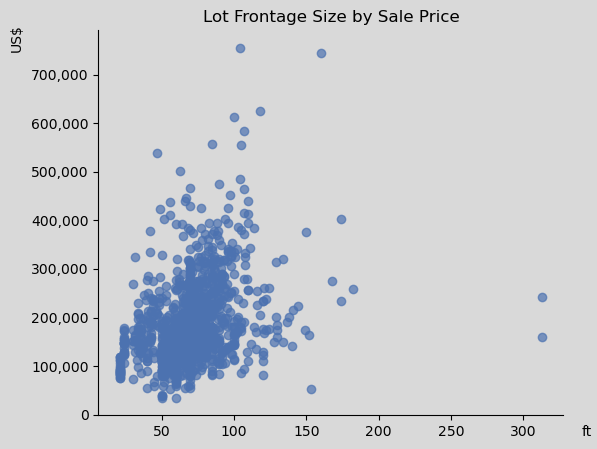

In [151]:
PlotScatter(HousePricesDF['LotFrontage'], HousePricesDF['SalePrice'], "Lot Frontage Size by Sale Price", "ft", "US$", 0, 0)

In [152]:
HousePricesDF.query('LotFrontage > 200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650.0,Pave,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069.0,0.0,0.0,2069.0,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960,RFn,2,505.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,None,11,2008,WD,Normal,242000.0
1298,1299,60,RL,313.0,63887.0,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692.0,950.0,0.0,5642.0,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418.0,TA,TA,Y,214.0,292.0,0.0,0.0,0.0,480.0,Gd,1,2008,New,Partial,160000.0


### **LotArea**

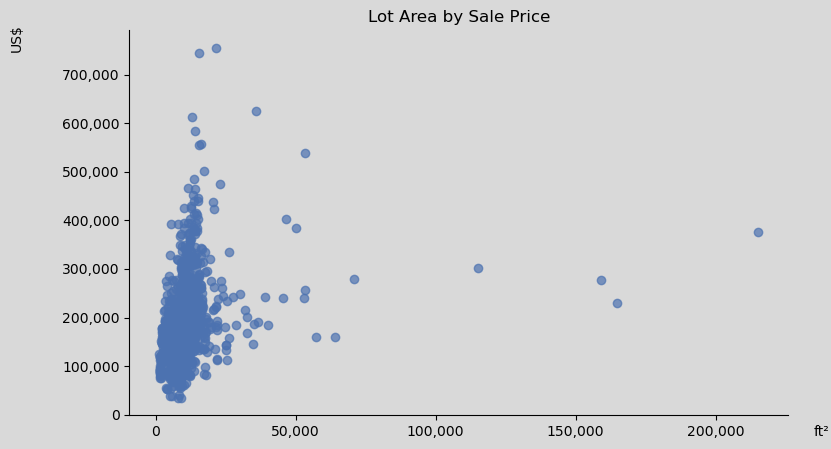

In [154]:
PlotScatter(HousePricesDF['LotArea'], HousePricesDF['SalePrice'], "Lot Area by Sale Price", "ft²", "US$", 1, 8.5)

In [155]:
HousePricesDF.query('LotArea >= 40000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.000000,50271.0,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810.0,Unf,0.0,32.0,1842.0,GasA,Gd,Y,SBrkr,1842.0,0.0,0.0,1842.0,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981,Fin,3,894.0,TA,TA,Y,857.0,72.0,0.0,0.0,0.0,0.0,None,11,2006,WD,Normal,385000.0
249,250,50,RL,69.644704,159000.0,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444.0,700.0,0.0,2144.0,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958,Fin,2,389.0,TA,TA,Y,0.0,98.0,0.0,0.0,0.0,0.0,None,6,2007,WD,Normal,277000.0
313,314,20,RL,150.000000,215245.0,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236.0,Rec,820.0,80.0,2136.0,GasW,TA,Y,SBrkr,2036.0,0.0,0.0,2036.0,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965,RFn,2,513.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,None,6,2009,WD,Normal,375000.0
335,336,190,RL,69.644704,164660.0,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249.0,BLQ,147.0,103.0,1499.0,GasA,Ex,Y,SBrkr,1619.0,167.0,0.0,1786.0,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965,Fin,2,529.0,TA,TA,Y,670.0,0.0,0.0,0.0,0.0,0.0,None,8,2008,WD,Normal,228950.0
384,385,60,RL,69.644704,53107.0,Pave,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985.0,Unf,0.0,595.0,1580.0,GasA,Ex,Y,SBrkr,1079.0,874.0,0.0,1953.0,1,0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,1992,Fin,2,501.0,TA,TA,Y,216.0,231.0,0.0,0.0,0.0,0.0,None,6,2007,WD,Normal,240000.0
451,452,20,RL,62.000000,70761.0,Pave,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655.0,Unf,0.0,878.0,1533.0,GasA,TA,Y,SBrkr,1533.0,0.0,0.0,1533.0,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975,Unf,2,576.0,TA,TA,Y,200.0,54.0,0.0,0.0,0.0,0.0,None,12,2006,WD,Normal,280000.0
457,458,20,RL,69.644704,53227.0,Pave,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116.0,Unf,0.0,248.0,1364.0,GasA,Ex,Y,SBrkr,1663.0,0.0,0.0,1663.0,1,0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954,Fin,2,529.0,TA,TA,Y,224.0,137.0,0.0,0.0,0.0,0.0,None,3,2008,WD,Normal,256000.0
523,524,60,RL,130.000000,40094.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138.0,1538.0,0.0,4676.0,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3,884.0,TA,TA,Y,208.0,406.0,0.0,0.0,0.0,0.0,None,10,2007,New,Partial,184750.0
661,662,60,RL,52.000000,46589.0,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1994,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,528.0,Gd,TA,PConc,Gd,Gd,No,GLQ,1361.0,Rec,180.0,88.0,1629.0,GasA,Ex,Y,SBrkr,1686.0,762.0,0.0,2448.0,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1994,RFn,3,711.0,TA,TA,Y,517.0,76.0,0.0,0.0,0.

### **YearBuilt**

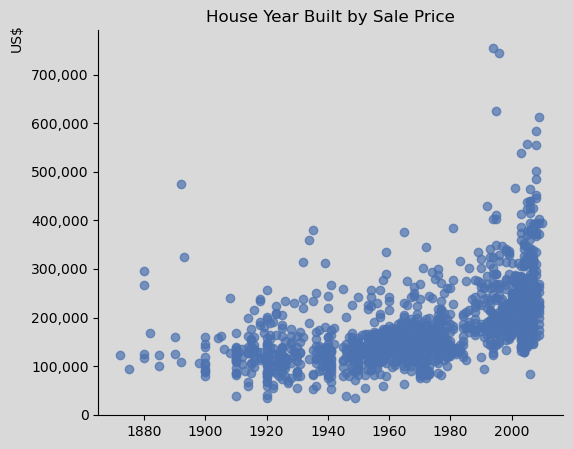

In [157]:
PlotScatter(HousePricesDF['YearBuilt'], HousePricesDF['SalePrice'], "House Year Built by Sale Price", "", "US$", 0, 0)

In [158]:
HousePricesDF.query('YearBuilt < 1900 & SalePrice > 250000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950.0,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,GasA,Ex,Y,SBrkr,1518.0,1518.0,572.0,3608.0,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993,Unf,3,840.0,Ex,TA,Y,0.0,260.0,0.0,0.0,410.0,0.0,None,6,2006,WD,Normal,475000.0
304,305,75,RM,87.0,18386.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1470.0,1470.0,GasA,Ex,Y,SBrkr,1675.0,1818.0,0.0,3493.0,0,0,3,0,3,1,Gd,10,Typ,1,Ex,Attchd,2003,Unf,3,870.0,TA,TA,Y,302.0,0.0,0.0,0.0,0.0,0.0,None,5,2008,WD,Normal,295000.0
583,584,75,RM,75.0,13500.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1237.0,1237.0,GasA,Gd,Y,SBrkr,1521.0,1254.0,0.0,2775.0,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988,Unf,2,880.0,Gd,TA,Y,105.0,502.0,0.0,0.0,0.0,0.0,None,7,2008,WD,Normal,325000.0
747,748,70,RM,65.0,11700.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0.0,Unf,0.0,1240.0,1240.0,GasW,TA,N,SBrkr,1320.0,1320.0,0.0,2640.0,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950,Unf,4,864.0,TA,TA,N,181.0,0.0,386.0,0.0,0.0,0.0,None,5,2009,WD,Normal,265979.0


In [159]:
HousePricesDF.query('(YearBuilt < 1900 & SalePrice > 400000) | (YearBuilt > 1980 & SalePrice > 700000)')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950.0,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,GasA,Ex,Y,SBrkr,1518.0,1518.0,572.0,3608.0,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993,Unf,3,840.0,Ex,TA,Y,0.0,260.0,0.0,0.0,410.0,0.0,None,6,2006,WD,Normal,475000.0
691,692,60,RL,104.0,21535.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444.0,1872.0,0.0,4316.0,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994,Fin,3,832.0,TA,TA,Y,382.0,50.0,0.0,0.0,0.0,0.0,None,1,2007,WD,Normal,755000.0
1182,1183,60,RL,160.0,15623.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411.0,2065.0,0.0,4476.0,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996,Fin,3,813.0,TA,TA,Y,171.0,78.0,0.0,0.0,0.0,555.0,Ex,7,2007,WD,Abnorml,745000.0


### **YearRemodAdd**

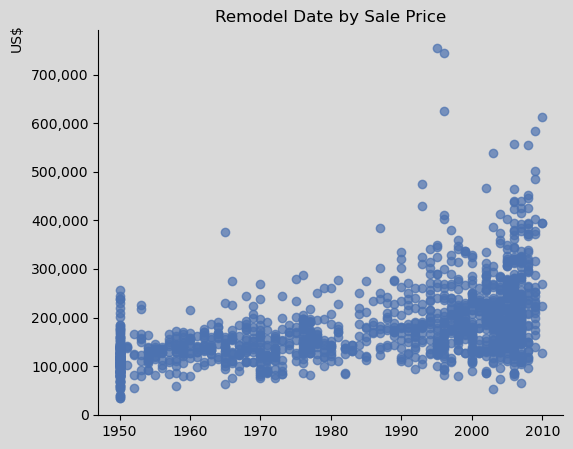

In [161]:
PlotScatter(HousePricesDF['YearRemodAdd'], HousePricesDF['SalePrice'], "Remodel Date by Sale Price", "", "US$", 0, 0)

### **MasVnrArea**

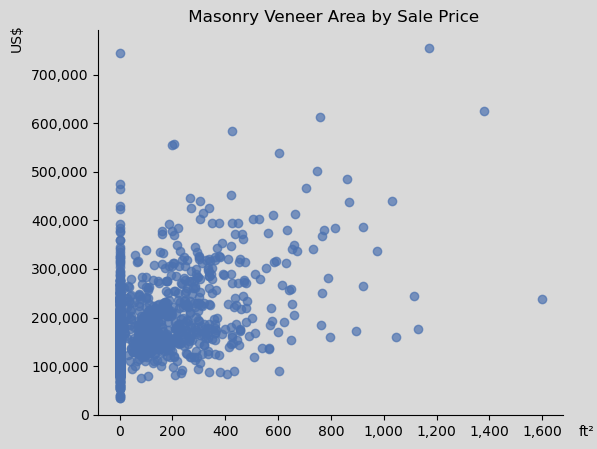

In [163]:
PlotScatter(HousePricesDF['MasVnrArea'], HousePricesDF['SalePrice'], " Masonry Veneer Area by Sale Price", "ft²", "US$", 1, 0)

In [164]:
HousePricesDF.query('MasVnrArea > 1000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682.0,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1410.0,1410.0,GasA,Ex,Y,SBrkr,1426.0,1519.0,0.0,2945.0,0,0,3,1,3,1,Gd,10,Typ,1,Gd,BuiltIn,2006,Fin,3,641.0,TA,TA,Y,192.0,0.0,37.0,0.0,0.0,0.0,None,10,2006,New,Partial,438780.0
70,71,20,RL,95.0,13651.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,0.0,343.0,2223.0,GasA,Ex,Y,SBrkr,2223.0,0.0,0.0,2223.0,1,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973,Fin,2,516.0,TA,TA,Y,300.0,0.0,0.0,0.0,0.0,0.0,None,2,2007,WD,Normal,244000.0
115,116,160,FV,34.0,3230.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,BrkFace,1129.0,TA,TA,PConc,Gd,TA,No,GLQ,419.0,Unf,0.0,310.0,729.0,GasA,Gd,Y,SBrkr,729.0,729.0,0.0,1458.0,0,0,2,1,2,1,TA,5,Typ,1,Fa,Detchd,1999,Unf,2,440.0,TA,TA,Y,0.0,32.0,0.0,0.0,0.0,0.0,None,6,2007,WD,Normal,176000.0
297,298,60,FV,66.0,7399.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649.0,Unf,0.0,326.0,975.0,GasA,Ex,Y,SBrkr,975.0,975.0,0.0,1950.0,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997,RFn,2,576.0,TA,TA,Y,0.0,10.0,0.0,0.0,198.0,0.0,None,6,2007,WD,Normal,239000.0
691,692,60,RL,104.0,21535.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444.0,1872.0,0.0,4316.0,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994,Fin,3,832.0,TA,TA,Y,382.0,50.0,0.0,0.0,0.0,0.0,None,1,2007,WD,Normal,755000.0
808,809,80,RL,85.0,13400.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,TA,TA,CBlock,TA,TA,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,TA,Y,SBrkr,1086.0,0.0,0.0,1086.0,1,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1966,RFn,2,484.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,None,6,2006,WD,Normal,159950.0
1169,1170,60,RL,118.0,35760.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1831.0,1796.0,0.0,3627.0,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995,Fin,3,807.0,TA,TA,Y,361.0,76.0,0.0,0.0,0.0,0.0,None,7,2006,WD,Normal,625000.0


### **BsmtFinSF1**

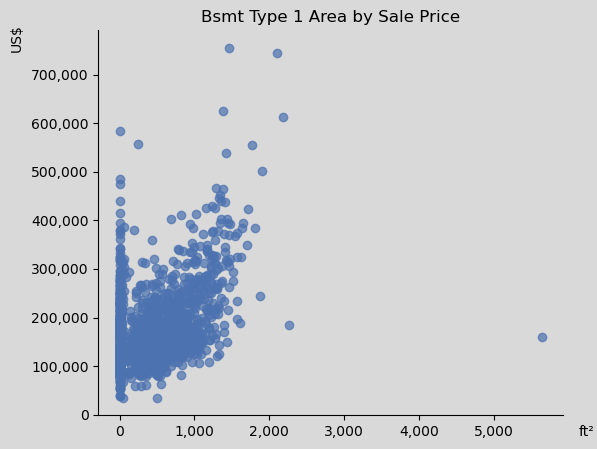

In [166]:
PlotScatter(HousePricesDF['BsmtFinSF1'], HousePricesDF['SalePrice'], "Bsmt Type 1 Area by Sale Price", "ft²", "US$", 1, 0)

In [167]:
HousePricesDF.query('BsmtFinSF1 > 1800')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271.0,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810.0,Unf,0.0,32.0,1842.0,GasA,Gd,Y,SBrkr,1842.0,0.0,0.0,1842.0,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981,Fin,3,894.0,TA,TA,Y,857.0,72.0,0.0,0.0,0.0,0.0,None,11,2006,WD,Normal,385000.0
70,71,20,RL,95.0,13651.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,0.0,343.0,2223.0,GasA,Ex,Y,SBrkr,2223.0,0.0,0.0,2223.0,1,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973,Fin,2,516.0,TA,TA,Y,300.0,0.0,0.0,0.0,0.0,0.0,None,2,2007,WD,Normal,244000.0
178,179,20,RL,63.0,17423.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904.0,Unf,0.0,312.0,2216.0,GasA,Ex,Y,SBrkr,2234.0,0.0,0.0,2234.0,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009,Fin,3,1166.0,TA,TA,Y,0.0,60.0,0.0,0.0,0.0,0.0,None,7,2009,New,Partial,501837.0
523,524,60,RL,130.0,40094.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138.0,1538.0,0.0,4676.0,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3,884.0,TA,TA,Y,208.0,406.0,0.0,0.0,0.0,0.0,None,10,2007,New,Partial,184750.0
898,899,20,RL,100.0,12919.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364.0,0.0,0.0,2364.0,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009,Fin,3,820.0,TA,TA,Y,0.0,67.0,0.0,0.0,0.0,0.0,None,3,2010,New,Partial,611657.0
1182,1183,60,RL,160.0,15623.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411.0,2065.0,0.0,4476.0,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996,Fin,3,813.0,TA,TA,Y,171.0,78.0,0.0,0.0,0.0,555.0,Ex,7,2007,WD,Abnorml,745000.0
1298,1299,60,RL,313.0,63887.0,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692.0,950.0,0.0,5642.0,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418.0,TA,TA,Y,214.0,292.0,0.0,0.0,0.0,480.0,Gd,1,2008,New,Partial,160000.0


### **BsmtFinSF2**

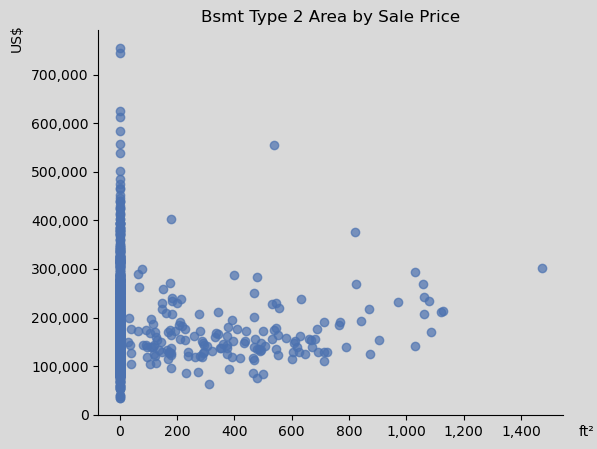

In [169]:
PlotScatter(HousePricesDF['BsmtFinSF2'], HousePricesDF['SalePrice'], "Bsmt Type 2 Area by Sale Price", "ft²", "US$", 1, 0)

In [170]:
HousePricesDF.query('BsmtFinSF2 > 1200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1986,1987,Gable,CompShg,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28.0,ALQ,1474.0,0.0,1502.0,GasA,Ex,Y,SBrkr,1553.0,1177.0,0.0,2730.0,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1987,Fin,2,576.0,TA,TA,Y,201.0,96.0,0.0,0.0,0.0,0.0,None,8,2007,WD,Normal,301000.0


### **BsmtUnfSF**

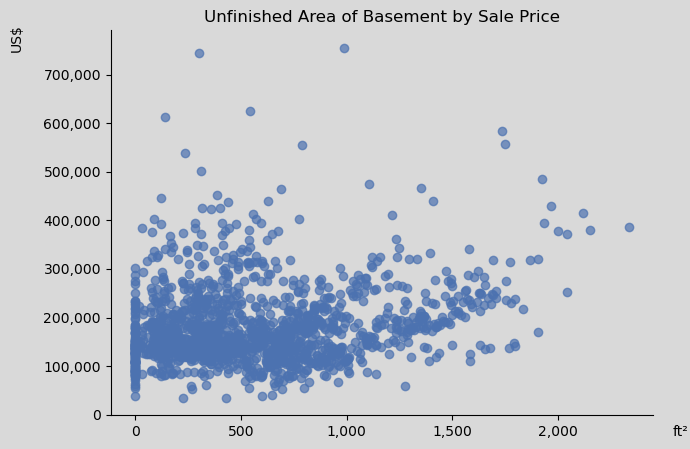

In [172]:
PlotScatter(HousePricesDF['BsmtUnfSF'], HousePricesDF['SalePrice'], "Unfinished Area of Basement by Sale Price", "ft²", "US$", 1, 7)

In [173]:
HousePricesDF.query('BsmtUnfSF > 1990')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
224,225,20,RL,103.0,13472.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56.0,Unf,0.0,2336.0,2392.0,GasA,Ex,Y,SBrkr,2392.0,0.0,0.0,2392.0,0,0,2,0,3,1,Ex,8,Typ,1,Ex,Attchd,2003,Fin,3,968.0,TA,TA,Y,248.0,105.0,0.0,0.0,0.0,0.0,None,6,2009,WD,Normal,386250.0
278,279,20,RL,107.0,14450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,CompShg,CemntBd,CmentBd,BrkFace,315.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,2121.0,2121.0,GasA,Ex,Y,SBrkr,2121.0,0.0,0.0,2121.0,0,0,2,1,3,1,Ex,8,Typ,1,Ex,Attchd,2007,Fin,3,732.0,TA,TA,Y,124.0,98.0,0.0,0.0,142.0,0.0,None,5,2007,New,Partial,415298.0
477,478,60,RL,105.0,13693.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,772.0,Ex,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,2153.0,2153.0,GasA,Ex,Y,SBrkr,2069.0,574.0,0.0,2643.0,0,0,2,1,3,1,Ex,9,Typ,1,Gd,BuiltIn,2006,Fin,3,694.0,TA,TA,Y,414.0,84.0,0.0,0.0,0.0,0.0,None,3,2007,WD,Normal,380000.0
581,582,20,RL,98.0,12704.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,2042.0,2042.0,GasA,Ex,Y,SBrkr,2042.0,0.0,0.0,2042.0,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009,RFn,3,1390.0,TA,TA,Y,0.0,90.0,0.0,0.0,0.0,0.0,None,8,2009,New,Partial,253293.0
678,679,20,RL,80.0,11844.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,464.0,Gd,TA,PConc,Ex,TA,Mn,Unf,0.0,Unf,0.0,2046.0,2046.0,GasA,Ex,Y,SBrkr,2046.0,0.0,0.0,2046.0,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2008,Fin,3,834.0,TA,TA,Y,322.0,82.0,0.0,0.0,0.0,0.0,None,7,2009,New,Partial,372500.0
1267,1268,20,RL,89.0,13214.0,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,Stucco,CmentBd,None,0.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,2002.0,2002.0,GasA,Ex,Y,SBrkr,2018.0,0.0,0.0,2018.0,0,0,2,0,3,1,Ex,10,Typ,1,Gd,Attchd,2009,Fin,3,746.0,TA,TA,Y,144.0,76.0,0.0,0.0,0.0,0.0,None,5,2010,WD,Normal,378500.0


### **TotalBsmtSF**

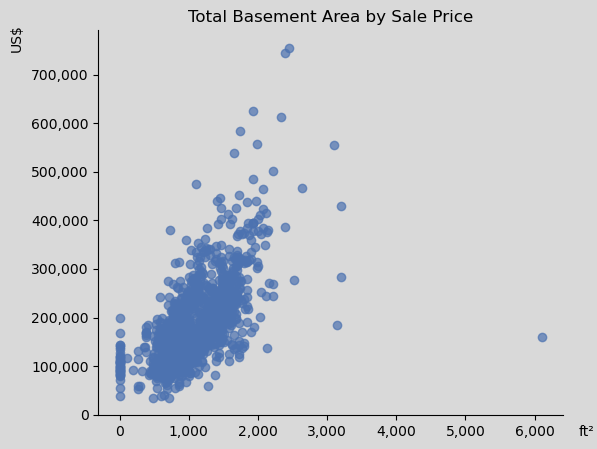

In [175]:
PlotScatter(HousePricesDF['TotalBsmtSF'], HousePricesDF['SalePrice'], "Total Basement Area by Sale Price", "ft²", "US$", 1, 0)

In [176]:
HousePricesDF.query('TotalBsmtSF > 3000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.000000,10655.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,Unf,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629.0,0.0,0.0,1629.0,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003,RFn,3,880.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,None,10,2009,WD,Normal,284000.0
440,441,20,RL,105.000000,15431.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,GasA,Ex,Y,SBrkr,2402.0,0.0,0.0,2402.0,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008,Fin,3,672.0,TA,TA,Y,0.0,72.0,0.0,0.0,170.0,0.0,None,4,2009,WD,Normal,555000.0
496,497,20,RL,69.644704,12692.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231.0,Unf,0.0,1969.0,3200.0,GasA,Ex,Y,SBrkr,3228.0,0.0,0.0,3228.0,1,0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1992,RFn,2,546.0,TA,TA,Y,264.0,75.0,291.0,0.0,0.0,0.0,None,5,2007,WD,Normal,430000.0
523,524,60,RL,130.000000,40094.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138.0,1538.0,0.0,4676.0,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3,884.0,TA,TA,Y,208.0,406.0,0.0,0.0,0.0,0.0,None,10,2007,New,Partial,184750.0
1298,1299,60,RL,313.000000,63887.0,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692.0,950.0,0.0,5642.0,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418.0,TA,TA,Y,214.0,292.0,0.0,0.0,0.0,480.0,Gd,1,2008,New,Partial,160000.0


### **1stFlrSF**

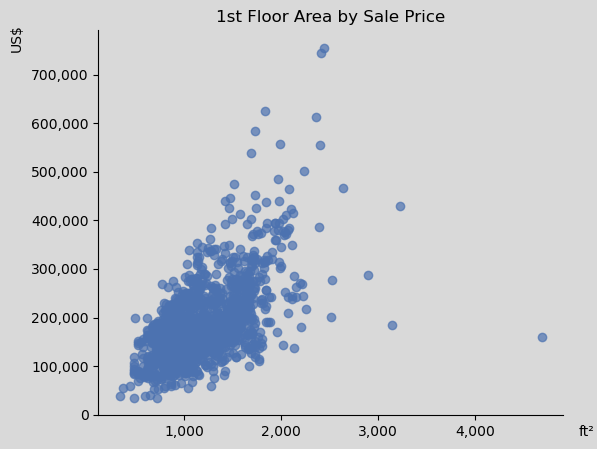

In [178]:
PlotScatter(HousePricesDF['1stFlrSF'], HousePricesDF['SalePrice'], "1st Floor Area by Sale Price", "ft²", "US$", 1, 0)

In [179]:
HousePricesDF.query('`1stFlrSF` > 2500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
496,497,20,RL,69.644704,12692.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231.0,Unf,0.0,1969.0,3200.0,GasA,Ex,Y,SBrkr,3228.0,0.0,0.0,3228.0,1,0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1992,RFn,2,546.0,TA,TA,Y,264.0,75.0,291.0,0.0,0.0,0.0,None,5,2007,WD,Normal,430000.0
523,524,60,RL,130.000000,40094.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138.0,1538.0,0.0,4676.0,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3,884.0,TA,TA,Y,208.0,406.0,0.0,0.0,0.0,0.0,None,10,2007,New,Partial,184750.0
529,530,20,RL,69.644704,32668.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,None,0.0,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515.0,0.0,0.0,2515.0,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975,RFn,2,484.0,TA,TA,Y,0.0,0.0,200.0,0.0,0.0,0.0,None,3,2007,WD,Alloca,200624.0
1024,1025,20,RL,69.644704,15498.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1976,1976,Hip,WdShake,Stone,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,ALQ,1165.0,LwQ,400.0,0.0,1565.0,GasA,TA,Y,SBrkr,2898.0,0.0,0.0,2898.0,1,0,2,0,2,1,Gd,10,Typ,1,Gd,Attchd,1976,Fin,2,665.0,TA,TA,Y,0.0,72.0,174.0,0.0,0.0,0.0,None,5,2008,COD,Abnorml,287000.0
1044,1045,20,RL,80.000000,9600.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,1Story,8,5,1981,1981,Hip,WdShngl,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,1104.0,Unf,0.0,1420.0,2524.0,GasA,TA,Y,SBrkr,2524.0,0.0,0.0,2524.0,1,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1981,Fin,2,542.0,TA,TA,Y,474.0,120.0,0.0,0.0,0.0,0.0,None,7,2009,WD,Normal,278000.0
1298,1299,60,RL,313.000000,63887.0,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692.0,950.0,0.0,5642.0,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418.0,TA,TA,Y,214.0,292.0,0.0,0.0,0.0,480.0,Gd,1,2008,New,Partial,160000.0
1373,1374,20,RL,69.644704,11400.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282.0,Unf,0.0,1351.0,2633.0,GasA,Ex,Y,SBrkr,2633.0,0.0,0.0,2633.0,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001,RFn,3,804.0,TA,TA,Y,314.0,140.0,0.0,0.0,0.0,0.0,None,3,2007,WD,Normal,466500.0


### **2ndFlrSF**

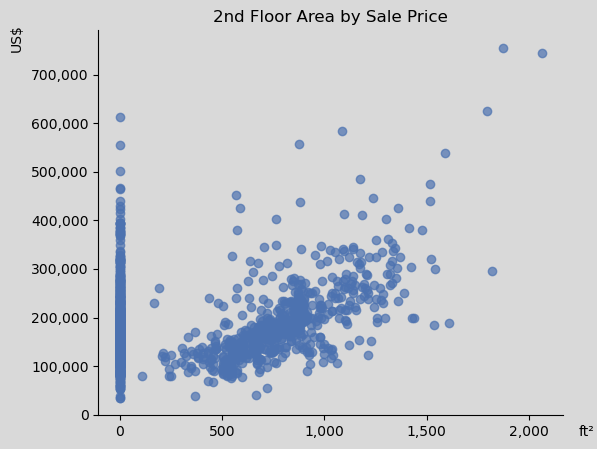

In [181]:
PlotScatter(HousePricesDF['2ndFlrSF'], HousePricesDF['SalePrice'], "2nd Floor Area by Sale Price", "ft²", "US$", 1, 0)

In [182]:
HousePricesDF.query('`2ndFlrSF` > 1750')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
304,305,75,RM,87.0,18386.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1470.0,1470.0,GasA,Ex,Y,SBrkr,1675.0,1818.0,0.0,3493.0,0,0,3,0,3,1,Gd,10,Typ,1,Ex,Attchd,2003,Unf,3,870.0,TA,TA,Y,302.0,0.0,0.0,0.0,0.0,0.0,None,5,2008,WD,Normal,295000.0
691,692,60,RL,104.0,21535.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444.0,1872.0,0.0,4316.0,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994,Fin,3,832.0,TA,TA,Y,382.0,50.0,0.0,0.0,0.0,0.0,None,1,2007,WD,Normal,755000.0
1169,1170,60,RL,118.0,35760.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1831.0,1796.0,0.0,3627.0,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995,Fin,3,807.0,TA,TA,Y,361.0,76.0,0.0,0.0,0.0,0.0,None,7,2006,WD,Normal,625000.0
1182,1183,60,RL,160.0,15623.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411.0,2065.0,0.0,4476.0,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996,Fin,3,813.0,TA,TA,Y,171.0,78.0,0.0,0.0,0.0,555.0,Ex,7,2007,WD,Abnorml,745000.0


### **LowQualFinSF**

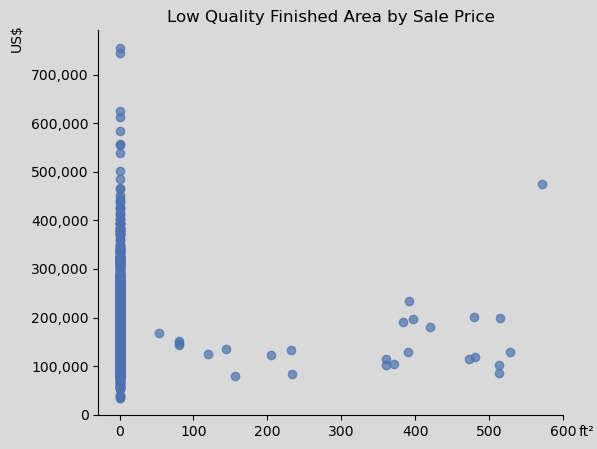

In [184]:
PlotScatter(HousePricesDF['LowQualFinSF'], HousePricesDF['SalePrice'], "Low Quality Finished Area by Sale Price", "ft²", "US$", 1, 0)

### **GrLivArea**

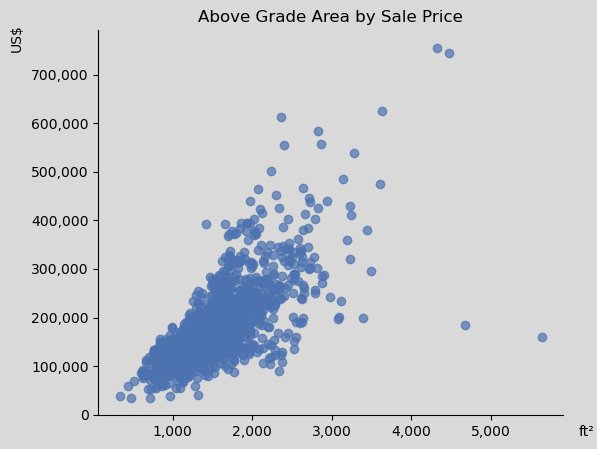

In [186]:
PlotScatter(HousePricesDF['GrLivArea'], HousePricesDF['SalePrice'], "Above Grade Area by Sale Price", "ft²", "US$", 1, 0)

In [187]:
HousePricesDF.query('GrLivArea > 4000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138.0,1538.0,0.0,4676.0,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3,884.0,TA,TA,Y,208.0,406.0,0.0,0.0,0.0,0.0,None,10,2007,New,Partial,184750.0
691,692,60,RL,104.0,21535.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444.0,1872.0,0.0,4316.0,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994,Fin,3,832.0,TA,TA,Y,382.0,50.0,0.0,0.0,0.0,0.0,None,1,2007,WD,Normal,755000.0
1182,1183,60,RL,160.0,15623.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411.0,2065.0,0.0,4476.0,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996,Fin,3,813.0,TA,TA,Y,171.0,78.0,0.0,0.0,0.0,555.0,Ex,7,2007,WD,Abnorml,745000.0
1298,1299,60,RL,313.0,63887.0,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692.0,950.0,0.0,5642.0,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418.0,TA,TA,Y,214.0,292.0,0.0,0.0,0.0,480.0,Gd,1,2008,New,Partial,160000.0


### **BsmtFullBath**

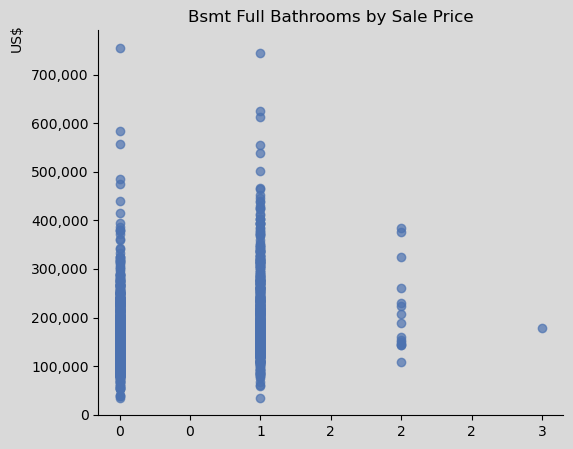

In [189]:
PlotScatter(HousePricesDF['BsmtFullBath'], HousePricesDF['SalePrice'], "Bsmt Full Bathrooms by Sale Price", "", "US$", 1, 0)

In [190]:
HousePricesDF.query('BsmtFullBath > 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200.0,Unf,0.0,0.0,1200.0,GasA,TA,Y,SBrkr,1200.0,0.0,0.0,1200.0,3,0,3,0,3,1,TA,5,Typ,0,None,None,0,None,0,0.0,None,None,Y,120.0,0.0,0.0,0.0,0.0,0.0,None,3,2009,WD,Alloca,179000.0


### **BsmtHalfBath**

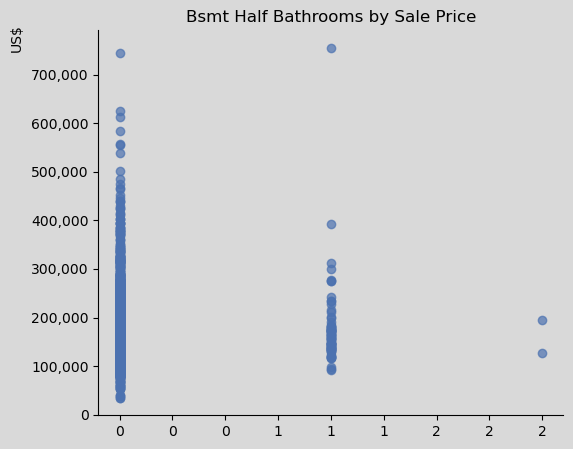

In [192]:
PlotScatter(HousePricesDF['BsmtHalfBath'], HousePricesDF['SalePrice'], "Bsmt Half Bathrooms by Sale Price", "", "US$", 1, 0)

In [193]:
HousePricesDF.query('BsmtHalfBath > 1')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1258.0,1258.0,GasA,Ex,Y,SBrkr,1402.0,0.0,0.0,1402.0,0,2,0,2,2,1,Gd,7,Typ,1,Gd,Attchd,2006,Fin,3,648.0,TA,TA,Y,120.0,16.0,0.0,0.0,0.0,0.0,None,2,2007,New,Partial,194201.0
954,955,90,RL,35.0,9400.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,945.0,Unf,0.0,0.0,945.0,GasA,TA,Y,SBrkr,980.0,0.0,0.0,980.0,0,2,2,0,4,0,TA,4,Typ,0,None,None,0,None,0,0.0,None,None,Y,0.0,0.0,0.0,0.0,0.0,0.0,None,10,2006,WD,AdjLand,127500.0


### **FullBath**

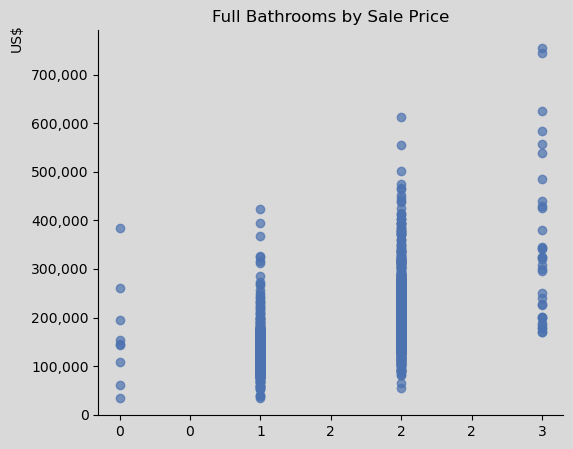

In [195]:
PlotScatter(HousePricesDF['FullBath'], HousePricesDF['SalePrice'], "Full Bathrooms by Sale Price", "", "US$", 1, 0)

### **HalfBath**

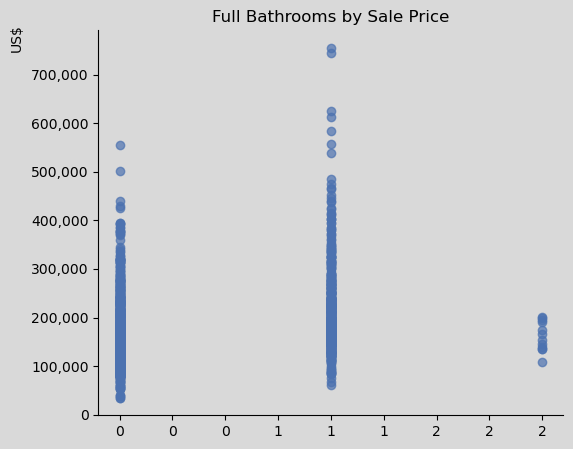

In [197]:
PlotScatter(HousePricesDF['HalfBath'], HousePricesDF['SalePrice'], "Full Bathrooms by Sale Price", "", "US$", 1, 0)

### **BedroomAbvGr**

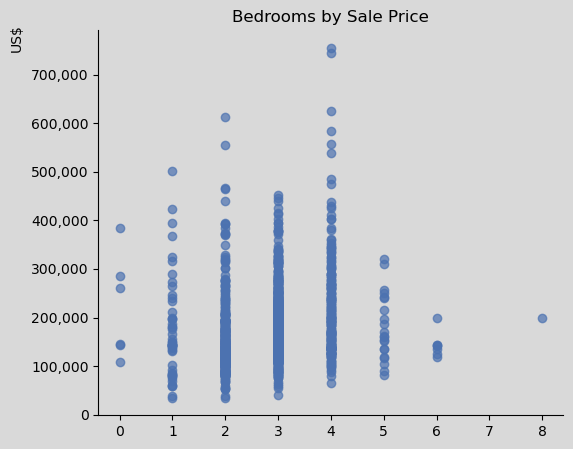

In [199]:
PlotScatter(HousePricesDF['BedroomAbvGr'], HousePricesDF['SalePrice'], "Bedrooms by Sale Price", "", "US$", 1, 0)

In [200]:
HousePricesDF.query('BedroomAbvGr < 1 | BedroomAbvGr > 7')[['Id', 'BedroomAbvGr', 'YrSold', 'SalePrice']]

,Id,BedroomAbvGr,YrSold,SalePrice
53,54,0,2006,385000.0
189,190,0,2008,286000.0
634,635,0,2010,144000.0
635,636,8,2007,200000.0
1163,1164,0,2008,108959.0
1213,1214,0,2006,145000.0
1270,1271,0,2010,260000.0


### **KitchenAbvGr**

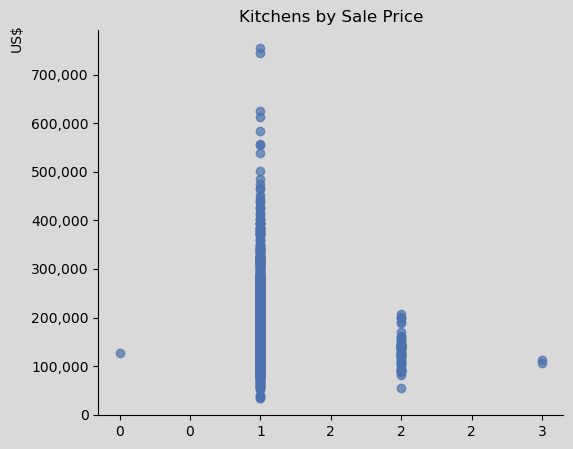

In [202]:
PlotScatter(HousePricesDF['KitchenAbvGr'], HousePricesDF['SalePrice'], "Kitchens by Sale Price", "", "US$", 1, 0)

In [203]:
HousePricesDF.query('KitchenAbvGr < 1 | KitchenAbvGr > 2')[['Id', 'KitchenAbvGr', 'YrSold', 'SalePrice']]

,Id,KitchenAbvGr,YrSold,SalePrice
48,49,3,2009,113000.0
809,810,3,2009,106000.0
954,955,0,2006,127500.0


### **TotRmsAbvGrd**

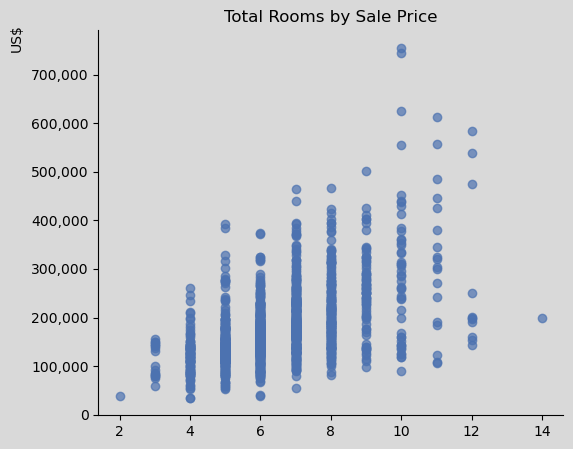

In [205]:
PlotScatter(HousePricesDF['TotRmsAbvGrd'], HousePricesDF['SalePrice'], "Total Rooms by Sale Price", "", "US$", 1, 0)

In [206]:
HousePricesDF.query('TotRmsAbvGrd < 3 | TotRmsAbvGrd > 12')[['Id', 'TotRmsAbvGrd', 'YrSold', 'SalePrice']]

,Id,TotRmsAbvGrd,YrSold,SalePrice
533,534,2,2007,39300.0
635,636,14,2007,200000.0


### **Fireplaces**

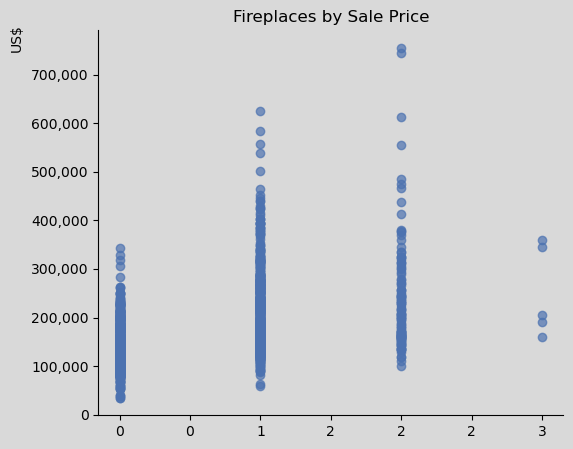

In [208]:
PlotScatter(HousePricesDF['Fireplaces'], HousePricesDF['SalePrice'], "Fireplaces by Sale Price", "", "US$", 1, 0)

In [209]:
HousePricesDF.query('Fireplaces > 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
166,167,20,RL,69.644704,10708.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1Story,5,5,1955,1993,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,LwQ,379.0,BLQ,768.0,470.0,1617.0,GasA,Ex,Y,FuseA,1867.0,0.0,0.0,1867.0,1,0,1,0,2,1,TA,7,Typ,3,Gd,Attchd,1955,Fin,1,303.0,TA,TA,Y,476.0,0.0,0.0,0.0,142.0,0.0,None,11,2009,COD,Normal,190000.0
309,310,20,RL,90.000000,12378.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1274.0,Unf,0.0,622.0,1896.0,GasA,Ex,Y,SBrkr,1944.0,0.0,0.0,1944.0,1,0,2,0,3,1,Ex,8,Typ,3,Ex,Attchd,2003,Fin,3,708.0,TA,TA,Y,208.0,175.0,0.0,0.0,0.0,0.0,None,11,2006,WD,Normal,360000.0
605,606,60,RL,85.000000,13600.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,7,6,1965,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,176.0,TA,TA,CBlock,TA,TA,No,BLQ,454.0,Unf,0.0,314.0,768.0,GasA,TA,Y,SBrkr,1186.0,800.0,0.0,1986.0,0,0,2,1,3,1,TA,7,Typ,3,Fa,Attchd,1965,Unf,2,486.0,TA,TA,Y,0.0,42.0,0.0,0.0,189.0,0.0,None,10,2009,WD,Normal,205000.0
642,643,80,RL,75.000000,13860.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,8,7,1972,1995,Gable,CompShg,Plywood,Wd Sdng,None,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,1410.0,Unf,0.0,542.0,1952.0,GasA,Gd,Y,SBrkr,2000.0,704.0,0.0,2704.0,1,0,2,1,4,1,Ex,9,Typ,3,TA,Attchd,1972,Fin,2,538.0,TA,TA,Y,269.0,111.0,0.0,0.0,0.0,0.0,None,7,2009,WD,Normal,345000.0
1298,1299,60,RL,313.000000,63887.0,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692.0,950.0,0.0,5642.0,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418.0,TA,TA,Y,214.0,292.0,0.0,0.0,0.0,480.0,Gd,1,2008,New,Partial,160000.0


### **GarageYrBlt**

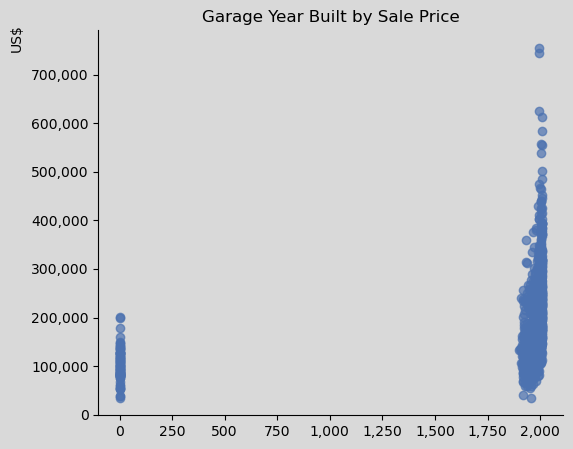

In [211]:
PlotScatter(HousePricesDF['GarageYrBlt'], HousePricesDF['SalePrice'], "Garage Year Built by Sale Price", "", "US$", 1, 0)

### **GarageCars**

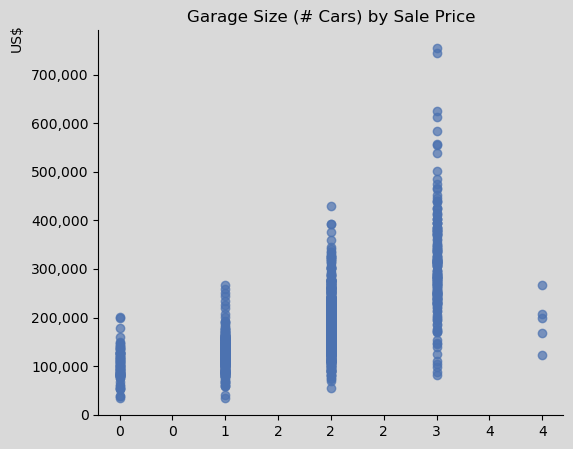

In [213]:
PlotScatter(HousePricesDF['GarageCars'], HousePricesDF['SalePrice'], "Garage Size (# Cars) by Sale Price", "", "US$", 1, 0)

In [214]:
HousePricesDF.query('GarageCars > 3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.000000,7060.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,200.0,TA,Gd,PConc,Gd,Gd,Gd,GLQ,1309.0,Unf,0.0,35.0,1344.0,GasA,Ex,Y,SBrkr,1344.0,0.0,0.0,1344.0,2,0,2,0,2,2,TA,8,Typ,0,None,Attchd,1997,Fin,4,784.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,None,11,2008,WD,Alloca,206300.0
747,748,70,RM,65.000000,11700.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0.0,Unf,0.0,1240.0,1240.0,GasW,TA,N,SBrkr,1320.0,1320.0,0.0,2640.0,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950,Unf,4,864.0,TA,TA,N,181.0,0.0,386.0,0.0,0.0,0.0,None,5,2009,WD,Normal,265979.0
1190,1191,190,RL,69.644704,32463.0,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159.0,Unf,0.0,90.0,1249.0,GasA,Ex,Y,SBrkr,1622.0,0.0,0.0,1622.0,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975,Fin,4,1356.0,TA,TA,Y,439.0,0.0,0.0,0.0,0.0,0.0,None,3,2007,WD,Normal,168000.0
1340,1341,20,RL,70.000000,8294.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,858.0,858.0,GasA,TA,Y,SBrkr,872.0,0.0,0.0,872.0,0,0,1,0,3,1,TA,5,Typ,0,None,Detchd,1974,Unf,4,480.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,None,6,2007,WD,Normal,123000.0
1350,1351,90,RL,91.000000,11643.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500.0,Unf,0.0,748.0,1248.0,GasA,TA,Y,SBrkr,1338.0,1296.0,0.0,2634.0,1,1,2,2,6,2,TA,12,Typ,0,None,Detchd,1969,Unf,4,968.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,None,8,2009,WD,Normal,200000.0


### **GarageArea**

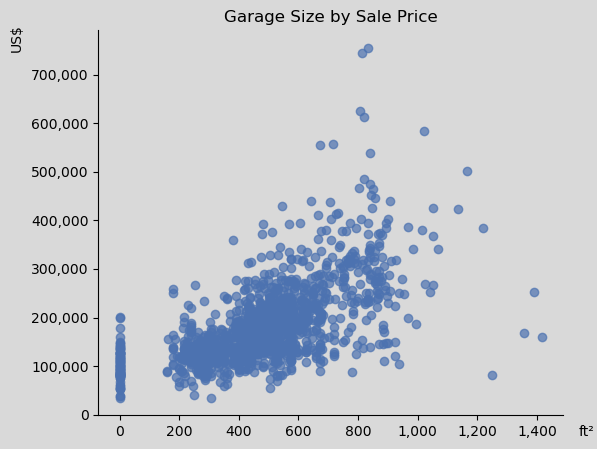

In [216]:
PlotScatter(HousePricesDF['GarageArea'], HousePricesDF['SalePrice'], "Garage Size by Sale Price", "ft²", "US$", 1, 0)

In [217]:
HousePricesDF.query('GarageArea > 1100')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.000000,17423.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904.0,Unf,0.0,312.0,2216.0,GasA,Ex,Y,SBrkr,2234.0,0.0,0.0,2234.0,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009,Fin,3,1166.0,TA,TA,Y,0.0,60.0,0.0,0.0,0.0,0.0,None,7,2009,New,Partial,501837.0
581,582,20,RL,98.000000,12704.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,2042.0,2042.0,GasA,Ex,Y,SBrkr,2042.0,0.0,0.0,2042.0,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009,RFn,3,1390.0,TA,TA,Y,0.0,90.0,0.0,0.0,0.0,0.0,None,8,2009,New,Partial,253293.0
664,665,20,RL,49.000000,20896.0,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721.0,Unf,0.0,356.0,2077.0,GasA,Ex,Y,SBrkr,2097.0,0.0,0.0,2097.0,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2005,Fin,3,1134.0,TA,TA,Y,192.0,267.0,0.0,0.0,0.0,0.0,None,1,2006,New,Partial,423000.0
825,826,20,RL,114.000000,14803.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636.0,Unf,0.0,442.0,2078.0,GasA,Ex,Y,SBrkr,2084.0,0.0,0.0,2084.0,1,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007,Fin,3,1220.0,TA,TA,Y,188.0,45.0,0.0,0.0,0.0,0.0,None,6,2008,New,Partial,385000.0
1061,1062,30,C (all),120.000000,18000.0,Grvl,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,894.0,894.0,GasA,TA,Y,SBrkr,894.0,0.0,0.0,894.0,0,0,1,0,2,1,TA,6,Typ,0,None,Detchd,1994,RFn,3,1248.0,TA,TA,Y,0.0,20.0,0.0,0.0,0.0,0.0,None,8,2008,ConLD,Normal,81000.0
1190,1191,190,RL,69.644704,32463.0,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159.0,Unf,0.0,90.0,1249.0,GasA,Ex,Y,SBrkr,1622.0,0.0,0.0,1622.0,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975,Fin,4,1356.0,TA,TA,Y,439.0,0.0,0.0,0.0,0.0,0.0,None,3,2007,WD,Normal,168000.0
1298,1299,60,RL,313.000000,63887.0,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692.0,950.0,0.0,5642.0,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418.0,TA,TA,Y,214.0,292.0,0.0,0.0,0.0,480.0,Gd,1,2008,New,Partial,160000.0


### **WoodDeckSF**

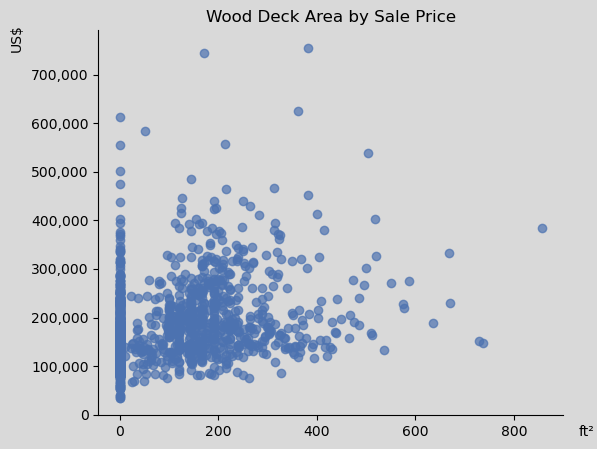

In [219]:
PlotScatter(HousePricesDF['WoodDeckSF'], HousePricesDF['SalePrice'], "Wood Deck Area by Sale Price", "ft²", "US$", 1, 0)

In [220]:
HousePricesDF.query('WoodDeckSF > 600')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.000000,50271.0,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810.0,Unf,0.0,32.0,1842.0,GasA,Gd,Y,SBrkr,1842.0,0.0,0.0,1842.0,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981,Fin,3,894.0,TA,TA,Y,857.0,72.0,0.0,0.0,0.0,0.0,None,11,2006,WD,Normal,385000.0
335,336,190,RL,69.644704,164660.0,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249.0,BLQ,147.0,103.0,1499.0,GasA,Ex,Y,SBrkr,1619.0,167.0,0.0,1786.0,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965,Fin,2,529.0,TA,TA,Y,670.0,0.0,0.0,0.0,0.0,0.0,None,8,2008,WD,Normal,228950.0
1068,1069,160,RM,42.000000,3964.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,6,4,1973,1973,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,837.0,Unf,0.0,105.0,942.0,GasA,Gd,Y,SBrkr,1291.0,1230.0,0.0,2521.0,1,0,2,1,5,1,TA,10,Maj1,1,Gd,Attchd,1973,Fin,2,576.0,TA,TA,Y,728.0,20.0,0.0,0.0,0.0,0.0,None,6,2006,WD,Normal,151400.0
1210,1211,60,RL,70.000000,11218.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1055.0,1055.0,GasA,Ex,Y,SBrkr,1055.0,790.0,0.0,1845.0,0,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1992,RFn,2,462.0,TA,TA,Y,635.0,104.0,0.0,0.0,0.0,0.0,None,5,2010,WD,Normal,189000.0
1313,1314,60,RL,108.000000,14774.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,165.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1393.0,1393.0,GasA,Ex,Y,SBrkr,1422.0,1177.0,0.0,2599.0,0,0,2,1,4,1,Gd,10,Typ,1,TA,BuiltIn,1999,Fin,3,779.0,TA,TA,Y,668.0,30.0,0.0,0.0,0.0,0.0,None,5,2010,WD,Normal,333168.0
1459,1460,20,RL,75.000000,9937.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830.0,LwQ,290.0,136.0,1256.0,GasA,Gd,Y,SBrkr,1256.0,0.0,0.0,1256.0,1,0,1,1,3,1,TA,6,Typ,0,None,Attchd,1965,Fin,1,276.0,TA,TA,Y,736.0,68.0,0.0,0.0,0.0,0.0,None,6,2008,WD,Normal,147500.0


### **OpenPorchSF**

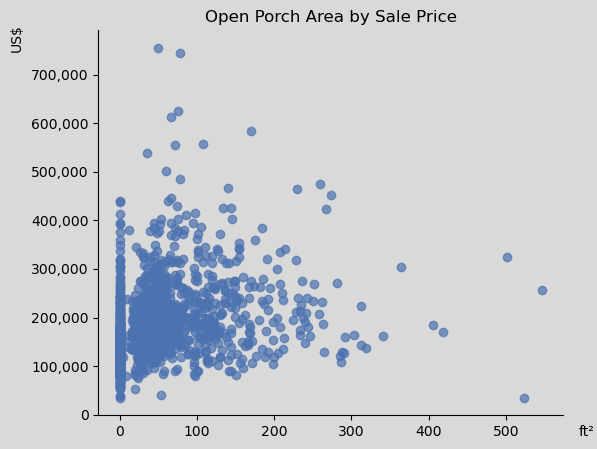

In [222]:
PlotScatter(HousePricesDF['OpenPorchSF'], HousePricesDF['SalePrice'], "Open Porch Area by Sale Price", "ft²", "US$", 1, 0)

In [223]:
HousePricesDF.query('OpenPorchSF > 350')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720.0,0.0,0.0,720.0,0,0,1,0,2,1,TA,4,Typ,0,None,None,0,None,0,0.0,None,None,N,0.0,523.0,115.0,0.0,0.0,0.0,None,11,2009,WD,Abnorml,34900.0
523,524,60,RL,130.0,40094.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138.0,1538.0,0.0,4676.0,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3,884.0,TA,TA,Y,208.0,406.0,0.0,0.0,0.0,0.0,None,10,2007,New,Partial,184750.0
583,584,75,RM,75.0,13500.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1237.0,1237.0,GasA,Gd,Y,SBrkr,1521.0,1254.0,0.0,2775.0,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988,Unf,2,880.0,Gd,TA,Y,105.0,502.0,0.0,0.0,0.0,0.0,None,7,2008,WD,Normal,325000.0
854,855,20,RL,102.0,17920.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1955,1974,Hip,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,306.0,Rec,1085.0,372.0,1763.0,GasA,TA,Y,SBrkr,1779.0,0.0,0.0,1779.0,1,0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1955,Unf,2,454.0,TA,TA,Y,0.0,418.0,0.0,0.0,312.0,0.0,None,7,2006,WD,Abnorml,170000.0
875,876,60,FV,75.0,9000.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,64.0,Unf,0.0,1120.0,1184.0,GasA,Ex,Y,SBrkr,1184.0,1426.0,0.0,2610.0,0,0,2,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,2,550.0,TA,TA,Y,208.0,364.0,0.0,0.0,0.0,0.0,None,8,2007,New,Partial,303477.0
1328,1329,50,RM,60.0,10440.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493.0,Unf,0.0,1017.0,1510.0,GasW,Ex,Y,SBrkr,1584.0,1208.0,0.0,2792.0,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920,Unf,2,520.0,Fa,TA,Y,0.0,547.0,0.0,0.0,480.0,0.0,None,6,2008,WD,Normal,256000.0


### **EnclosedPorch**

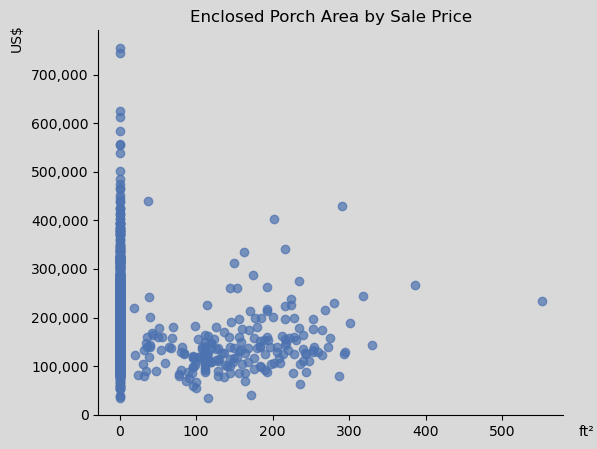

In [225]:
PlotScatter(HousePricesDF['EnclosedPorch'], HousePricesDF['SalePrice'], "Enclosed Porch Area by Sale Price", "ft²", "US$", 1, 0)

In [226]:
HousePricesDF.query('EnclosedPorch > 350')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036.0,LwQ,184.0,140.0,1360.0,GasA,Gd,Y,SBrkr,1360.0,1360.0,392.0,3112.0,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918,Unf,2,795.0,TA,TA,Y,0.0,16.0,552.0,0.0,0.0,512.0,Ex,3,2006,WD,Abnorml,235000.0
747,748,70,RM,65.0,11700.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0.0,Unf,0.0,1240.0,1240.0,GasW,TA,N,SBrkr,1320.0,1320.0,0.0,2640.0,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950,Unf,4,864.0,TA,TA,N,181.0,0.0,386.0,0.0,0.0,0.0,None,5,2009,WD,Normal,265979.0


### **3SsnPorch**

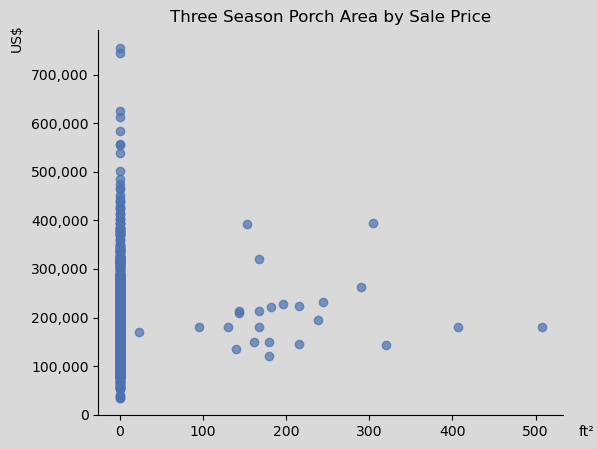

In [228]:
PlotScatter(HousePricesDF['3SsnPorch'], HousePricesDF['SalePrice'], "Three Season Porch Area by Sale Price", "ft²", "US$", 1, 0)

### **ScreenPorch**

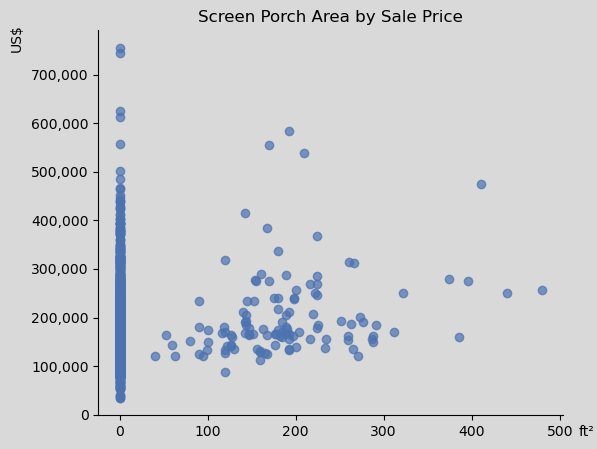

In [230]:
PlotScatter(HousePricesDF['ScreenPorch'], HousePricesDF['SalePrice'], "Screen Porch Area by Sale Price", "ft²", "US$", 1, 0)

In [231]:
HousePricesDF.query('ScreenPorch > 350')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.000000,22950.0,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,GasA,Ex,Y,SBrkr,1518.0,1518.0,572.0,3608.0,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993,Unf,3,840.0,Ex,TA,Y,0.0,260.0,0.0,0.0,410.0,0.0,None,6,2006,WD,Normal,475000.0
359,360,60,RL,78.000000,12011.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,530.0,Gd,TA,PConc,Gd,TA,Av,GLQ,956.0,Unf,0.0,130.0,1086.0,GasA,Ex,Y,SBrkr,1086.0,838.0,0.0,1924.0,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998,RFn,2,592.0,TA,TA,Y,208.0,75.0,0.0,0.0,374.0,0.0,None,6,2006,WD,Normal,280000.0
426,427,80,RL,69.644704,12800.0,Pave,Reg,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,SLvl,7,5,1989,1989,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,145.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1518.0,Unf,0.0,0.0,1518.0,GasA,Gd,Y,SBrkr,1644.0,0.0,0.0,1644.0,1,1,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1989,Fin,2,569.0,TA,TA,Y,80.0,0.0,0.0,0.0,396.0,0.0,None,8,2009,WD,Normal,275000.0
625,626,20,RL,87.000000,10000.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1962,1962,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,261.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1116.0,1116.0,GasA,TA,Y,SBrkr,1116.0,0.0,0.0,1116.0,0,0,1,1,3,1,TA,5,Typ,0,None,Attchd,1962,Unf,2,440.0,TA,TA,Y,0.0,0.0,0.0,0.0,385.0,0.0,None,2,2010,WD,Normal,160000.0
1328,1329,50,RM,60.000000,10440.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493.0,Unf,0.0,1017.0,1510.0,GasW,Ex,Y,SBrkr,1584.0,1208.0,0.0,2792.0,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920,Unf,2,520.0,Fa,TA,Y,0.0,547.0,0.0,0.0,480.0,0.0,None,6,2008,WD,Normal,256000.0
1386,1387,60,RL,80.000000,16692.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790.0,LwQ,469.0,133.0,1392.0,GasA,TA,Y,SBrkr,1392.0,1392.0,0.0,2784.0,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978,RFn,2,564.0,TA,TA,Y,0.0,112.0,0.0,0.0,440.0,519.0,Fa,7,2006,WD,Normal,250000.0


### **PoolArea**

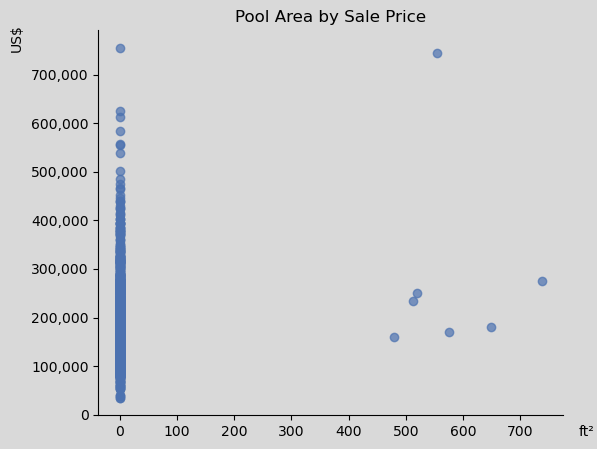

In [233]:
PlotScatter(HousePricesDF['PoolArea'], HousePricesDF['SalePrice'], "Pool Area by Sale Price", "ft²", "US$", 1, 0)

### **MoSold**

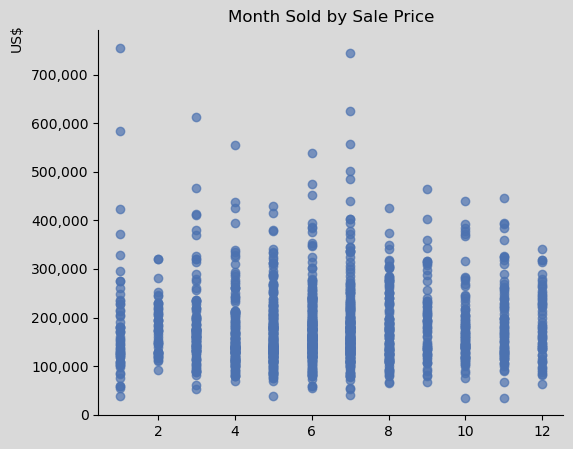

In [235]:
PlotScatter(HousePricesDF['MoSold'], HousePricesDF['SalePrice'], "Month Sold by Sale Price", "", "US$", 0, 0)

### **YrSold**

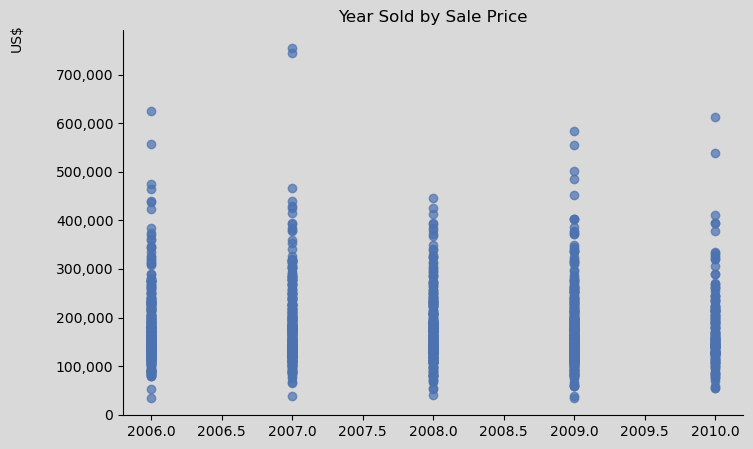

In [237]:
PlotScatter(HousePricesDF['YrSold'], HousePricesDF['SalePrice'], "Year Sold by Sale Price", "", "US$", 0, 8)

### **Dropping the Outliers**

In [239]:
values = [49, 54, 59, 71, 106, 116, 167, 186, 189, 198, 250, 298, 305, 314, 323, 333, 336, 360, 385, 421, 427, 452, 458, 496, 518,
          524, 530, 534, 582, 584, 598, 606, 626, 635, 636, 662, 692, 707, 739, 748, 756, 770, 809, 810, 849, 855, 876, 935,
          955, 982, 1025, 1045, 1062, 1069, 1164, 1170, 1183, 1191, 1211, 1214, 1271, 1290, 1299, 1314, 1329, 1341, 1351, 1387, 1397, 1460]

HousePricesDF = HousePricesDF[HousePricesDF.Id.isin(values) == False].copy()

In [240]:
HousePricesDF.reset_index(drop=True, inplace=True)

In [241]:
HousePricesDF.shape

(1390, 77)

# **AUTHOR**

## Fábio Galdino